# EOF analysis for US surface air temperature and SST over the Pacific
This example is taken from https://atmos.washington.edu/~breth/classes/AS552/matlab/lect/html/MCA_PSSTA_USTA.html

In [1]:
from xMCA import xMCA
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sstpc = xr.open_dataarray('data/SSTPac.nc').transpose(*['time', 'lat', 'lon'])
sstpc.name = 'SSTPC'
print(sstpc)

<xarray.DataArray 'SSTPC' (time: 396, lat: 30, lon: 84)>
[997920 values with dtype=float64]
Coordinates:
  * lat      (lat) int16 -29 -27 -25 -23 -21 -19 -17 ... 17 19 21 23 25 27 29
  * lon      (lon) uint16 124 126 128 130 132 134 ... 280 282 284 286 288 290
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 388 389 390 391 392 393 394 395


Decompsition and retrieve the first and second loadings and expansion coefficeints 

In [3]:
'''
decomposition, time should be in the first axis
lp is for SSTPC
rp is for USTA
'''

sst_ts = xMCA(sstpc, sstpc.rename('SSTPC_copy'))
sst_ts.solver()
lp, _ = sst_ts.patterns(n=2)
le, _ = sst_ts.expansionCoefs(n=2)
frac = sst_ts.covFracs(n=2)
print(frac)

<xarray.DataArray 'frac' (n: 2)>
array([0.873075, 0.04946 ])
Coordinates:
  * n        (n) int64 0 1
Attributes:
    long_name:  Fractions explained of the covariance matrix between SSTPC an...


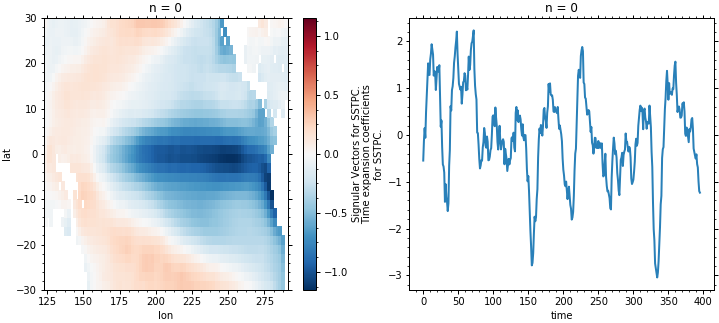

In [4]:
fig, ax1 = plt.subplots(1, 2, figsize=(12, 5))
lp[0].plot(ax=ax1[0])
le[0].plot(ax=ax1[1])


Regress PC1 to the original SST field

In [5]:
lh, _ = sst_ts.homogeneousPatterns(n=1)

/Users/he.1519/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


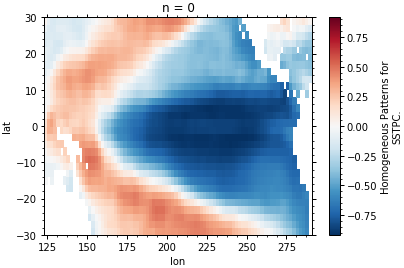

In [6]:
fig, ax1= plt.subplots()
lh[0].plot(ax=ax1)
